In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [2]:
# 读取数据
data = pd.read_csv('Y.S.csv')


In [3]:
# 假设目标变量是最后一列，特征变量是其他列
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [4]:
# 数据预处理：去掉逗号并转换为浮点数
X = X.replace({',': ''}, regex=True).astype(float)
y = y.replace({',': ''}, regex=True).astype(float)

# 处理缺失值：用列的均值填充
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


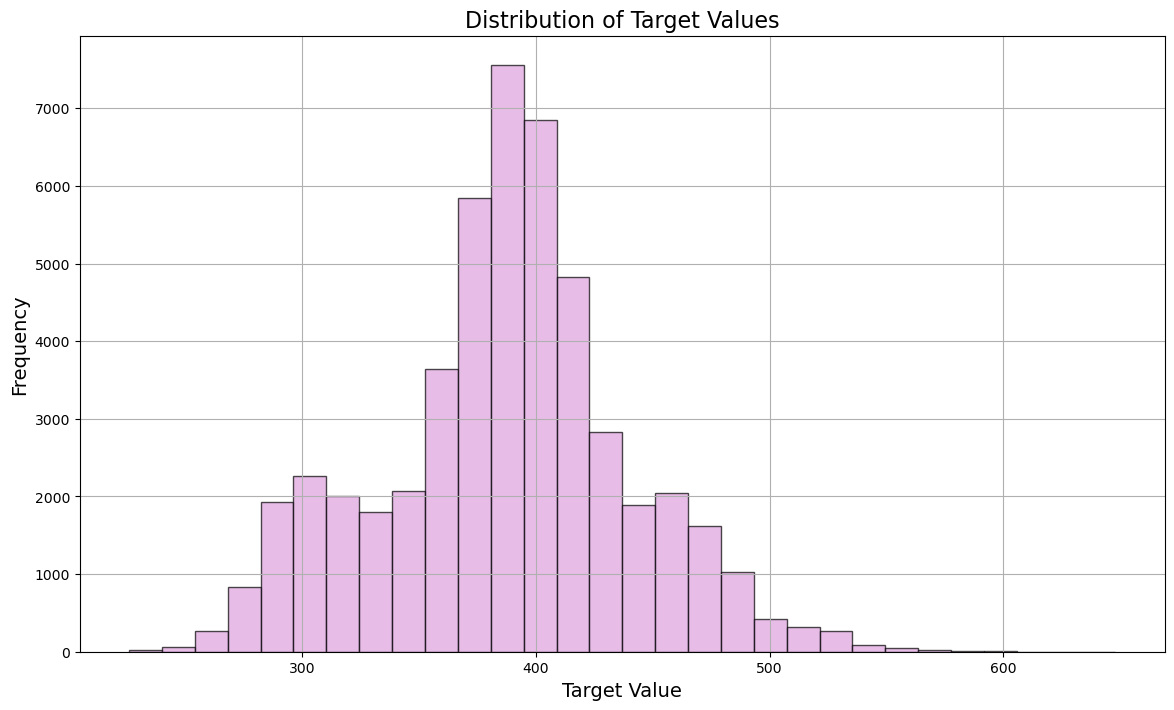

In [7]:
# 绘制目标值分布直方图
plt.figure(figsize=(14, 8), dpi=100)
plt.hist(y, bins=30, color='plum', edgecolor='black', alpha=0.7)
plt.xlabel('Target Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Target Values', fontsize=16)
plt.grid(True)
plt.savefig('Target_Value_Distribution.png', dpi=300)
plt.show()
plt.close()

Linear Regression:
  MAE (Train): 17.0848
  R2 (Train): 0.8133
  MAE (Test): 17.1769
  R2 (Test): 0.8117



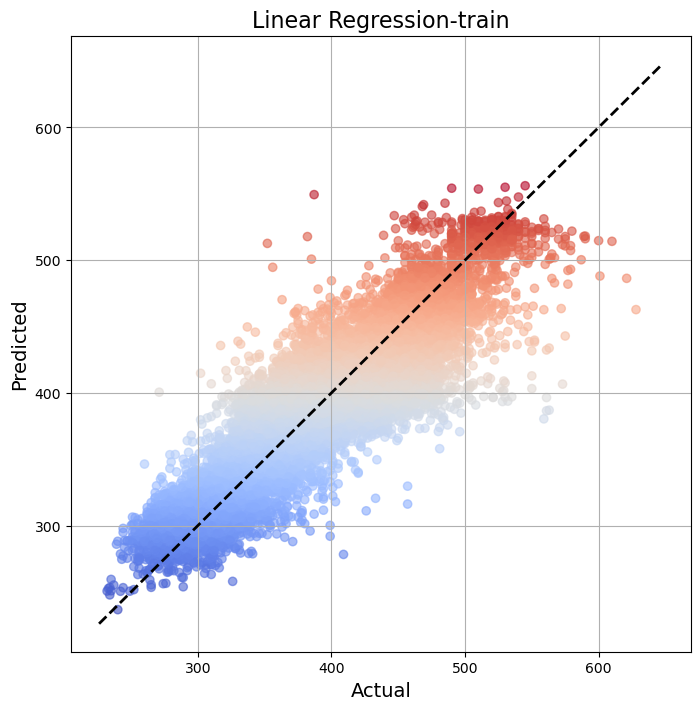

In [10]:
# 定义并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'Linear Regression:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(model, 'Linear_Regression.joblib')

# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Linear Regression-test', fontsize=16)
plt.grid(True)
plt.savefig('Linear_Regression_test.png', dpi=300)
plt.show
plt.close()

# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Linear Regression-train', fontsize=16)
plt.grid(True)
plt.savefig('Linear_Regression_train.png', dpi=300)
plt.show()
plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('Linear Regression - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('Linear_Regression_learning_curve.png', dpi=300)
# plt.show()
# plt.close()

/home/customer/anaconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.72356e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression:
  MAE (Train): 17.1575
  R2 (Train): 0.8120
  MAE (Test): 17.2606
  R2 (Test): 0.8103



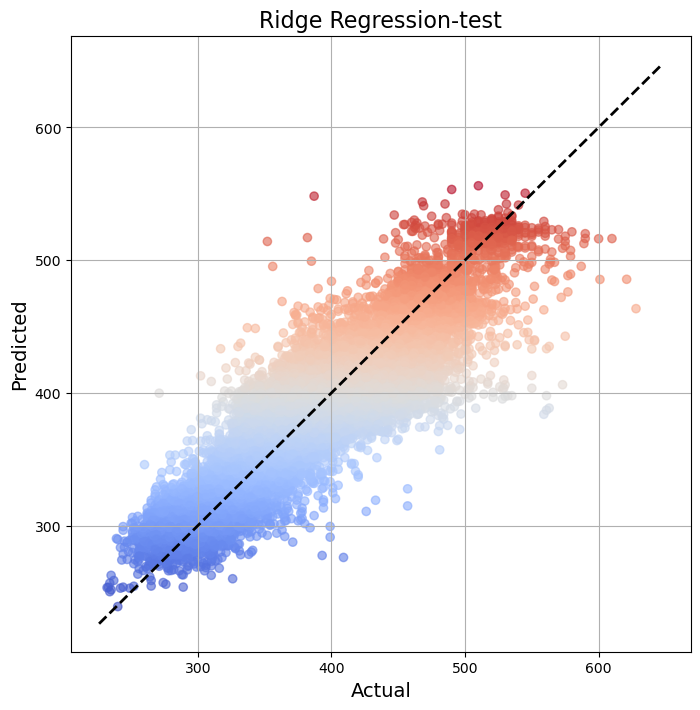

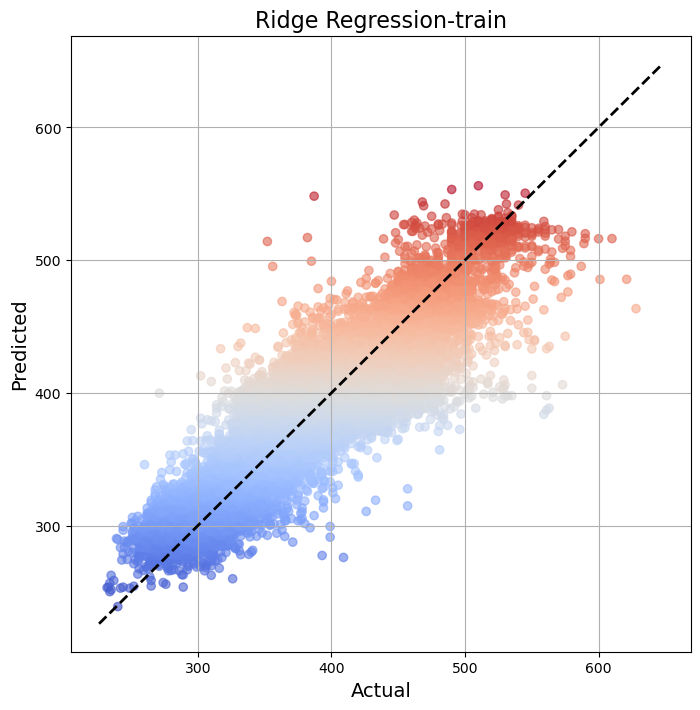

In [14]:
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
best_ridge=Ridge(alpha=0.1)
best_ridge.fit(X_train, y_train)
# 预测
y_train_pred = best_ridge.predict(X_train)
y_test_pred = best_ridge.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'Ridge Regression:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(best_ridge, 'Ridge_Regression.joblib')

# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Ridge Regression-test', fontsize=16)
plt.grid(True)
plt.savefig('Ridge_Regression-test.png', dpi=300)
plt.show()
plt.close()
# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Ridge Regression-train', fontsize=16)
plt.grid(True)
plt.savefig('Ridge_Regression-train.png', dpi=300)
plt.show()
plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(best_ridge, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('Ridge Regression - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('Ridge_Regression_learning_curve.png', dpi=300)
# plt.show()
# plt.close()

Decision Tree Regression (Manual Hyperparameters):
  MAE (Train): 0.0000
  R2 (Train): 1.0000
  MAE (Test): 21.7413
  R2 (Test): 0.6843



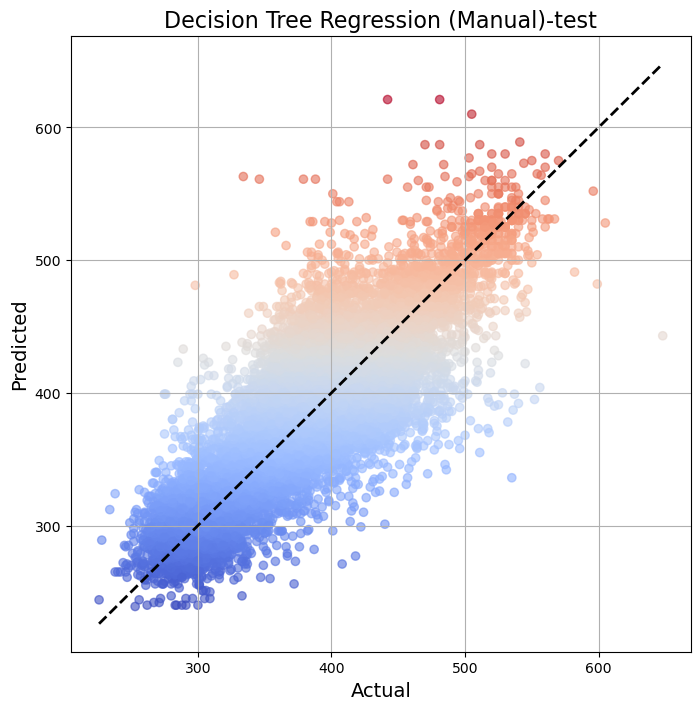

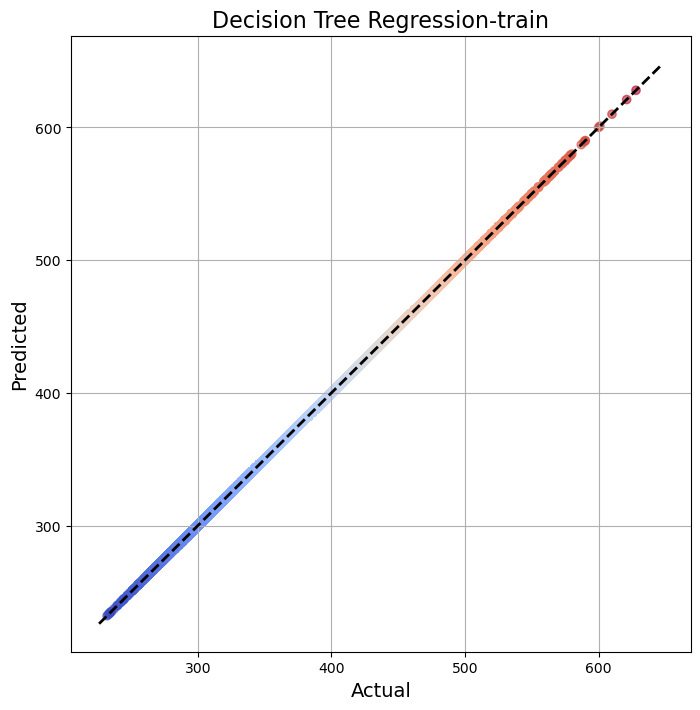

In [15]:
# 手动选择决策树回归的超参数
tree = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# 训练模型
tree.fit(X_train, y_train)

# 预测
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'Decision Tree Regression (Manual Hyperparameters):\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(tree, 'Decision_Tree_Regression_Manual.joblib')

# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Decision Tree Regression (Manual)-test', fontsize=16)
plt.grid(True)
plt.savefig('Decision_Tree_Regression_manual_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Decision Tree Regression-train', fontsize=16)
plt.grid(True)
plt.savefig('Decision_Tree_Regression_train.png', dpi=300)
plt.show()
plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(tree, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('Decision Tree Regression (Manual) - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('Decision_Tree_Regression_manual_learning_curve.png', dpi=300)
# plt.show()
# plt.close()


In [ ]:
# 初始化随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# 训练模型
rf.fit(X_train, y_train)

# 预测
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'Decision Tree Regression (Manual Hyperparameters):\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(tree, 'Random_forest_Regression_Manual.joblib')

# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Random forest (Manual)-test', fontsize=16)
plt.grid(True)
plt.savefig('Random_forest_manual_test.png', dpi=300)
plt.show()  # 显示图像
plt.close()

# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
# plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolors='w', linewidths=0.5)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Random_forest-train', fontsize=16)
plt.grid(True)
plt.savefig('Random_forest_Regression_train.png', dpi=300)
plt.show()  # 显示图像
plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(tree, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('Random_forest_Regression (Manual) - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.show()  # 显示图像
# plt.savefig('Random_forest_Regression_manual_learning_curve.png', dpi=300)
# plt.close()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import joblib
# 初始化XGBoost回归模型
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42)

# 训练模型
xg_reg.fit(X_train, y_train)

# 预测
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'XGBoost Regression:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(xg_reg, 'XGBoost_Regression.joblib')

# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.text(0.1, 0.9, f'MAE (Test): {mae_test:.2f}', transform=plt.gca().transAxes, fontsize=12)
# plt.text(0.1, 0.85, f'R2 (Test): {r2_test:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('XGBoost Regression - Test', fontsize=16)
plt.grid(True)
plt.savefig('XGBoost_Regression_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# plt.text(0.1, 0.9, f'MAE (Test): {mae_test:.2f}', transform=plt.gca().transAxes, fontsize=12)
# plt.text(0.1, 0.85, f'R2 (Test): {r2_test:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('XGBoost Regression - Train', fontsize=16)
plt.grid(True)
plt.savefig('XGBoost_Regression_train.png', dpi=300)
plt.show()
plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(xg_reg, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('XGBoost Regression - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('XGBoost_Regression_learning_curve.png', dpi=300)
# plt.show()
# plt.close()

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
import joblib


# 初始化极端随机树回归模型并设置超参数
etr = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# 训练模型
etr.fit(X_train, y_train)

# 预测
y_train_pred = etr.predict(X_train)
y_test_pred = etr.predict(X_test)

# 评估
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 打印评估结果
print(f'ExtraTrees Regression:\n'
      f'  MAE (Train): {mae_train:.4f}\n'
      f'  R2 (Train): {r2_train:.4f}\n'
      f'  MAE (Test): {mae_test:.4f}\n'
      f'  R2 (Test): {r2_test:.4f}\n')

# 保存模型
joblib.dump(etr, 'ExtraTrees_Regression.joblib')

# 绘制拟合图 - 测试集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_test, y_test_pred, c=y_test_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('ExtraTrees Regression - Test', fontsize=16)
plt.grid(True)
plt.savefig('ExtraTrees_Regression_test.png', dpi=300)
plt.show()
plt.close()

# 绘制拟合图 - 训练集
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(y_train, y_train_pred, c=y_train_pred, cmap='coolwarm', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('ExtraTrees Regression - Train', fontsize=16)
plt.grid(True)
plt.savefig('ExtraTrees_Regression_train.png', dpi=300)
plt.show()
plt.close()

# # 绘制学习曲线
# train_sizes, train_scores, test_scores = learning_curve(etr, X, y, cv=5, scoring='neg_mean_absolute_error')
# train_scores_mean = -np.mean(train_scores, axis=1)
# test_scores_mean = -np.mean(test_scores, axis=1)

# plt.figure(figsize=(14, 8), dpi=100)
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
# plt.xlabel('Training examples', fontsize=14)
# plt.ylabel('MAE', fontsize=14)
# plt.title('ExtraTrees Regression - Learning Curve', fontsize=16)
# plt.legend(loc='best', fontsize=12)
# plt.grid(True)
# plt.savefig('ExtraTrees_Regression_learning_curve.png', dpi=300)
# plt.show()
# plt.close()
